In [1]:
sc

<SparkContext master=spark://ec2-18-223-209-87.us-east-2.compute.amazonaws.com:7077 appName=PySparkShell>

In [2]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
from pyspark.ml.feature import VectorAssembler

In [3]:
n_samples=1600
n_clusters=3
n_features =2
n_workers = 4

In [4]:
# Creating a n_features=2 Dim dataset with centers=3 clusters
Xs, Ys = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_clusters)
print(Xs.shape)

(1600, 2)


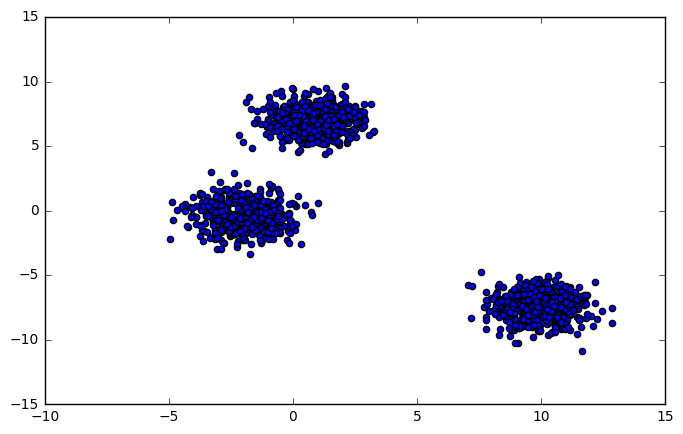

In [5]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 5)
fig = plt.figure()

# Plotting along with the Centroids
plt.scatter([point[0] for point in Xs], [point[1] for point in Xs])

In [6]:
df=spark.createDataFrame(pd.DataFrame(Xs,columns=list(['x1','x2'])))
df.show()

+-------------------+-------------------+
|                 x1|                 x2|
+-------------------+-------------------+
| 0.6907356011261113|  6.602489791852874|
|-0.4922027367447215|  9.278889816189107|
| 10.681181694546803| -6.995052144165196|
| 2.2479176593496373|  8.115008544218055|
|-1.1856697765766941|0.13485129189184952|
|-1.6795133072306114|0.20958745261529277|
| 2.0904960883809167|  7.477031141931227|
| -0.416365505641368|   6.72210981177547|
| 1.0592492616039944|  8.010719393548603|
|  9.469233289693378|  -8.75721443018496|
| 10.521501890345977|  -7.12992588061095|
| -3.918424580895903| 0.3923765825103943|
|  -1.73632200747354| -3.346727510192263|
|  8.771822391520349| -7.599951023815318|
|  9.110148901525898| -9.044352547163143|
|-2.3705728973895637|-1.0534820817664188|
|  9.916268224109876|  -5.30586457380481|
| -2.755567244440423|0.36154657603194673|
|-1.1366943433647028|-0.6896174795159125|
|-1.7898983433210134|0.19170545804940486|
+-------------------+-------------

In [7]:
vecAssembler = VectorAssembler(inputCols=df.columns, outputCol="features")
vector_df = vecAssembler.transform(df)
kmeans = KMeans().setK(n_clusters).setSeed(1)
model = kmeans.fit(vector_df )

In [8]:
# Make predictions
predictions_df = model.transform(vector_df)

In [9]:
# Shows the result.
centers = model.clusterCenters()
C=np.array(centers)
print(C)

[[-2.01552536 -0.4026473 ]
 [ 9.90885502 -7.42452637]
 [ 0.90467578  7.00521701]]


In [10]:
predictions=predictions_df.collect()

In [11]:
predictions[0:5]

[Row(x1=0.6907356011261113, x2=6.602489791852874, features=DenseVector([0.6907, 6.6025]), prediction=2),
 Row(x1=-0.4922027367447215, x2=9.278889816189107, features=DenseVector([-0.4922, 9.2789]), prediction=2),
 Row(x1=10.681181694546803, x2=-6.995052144165196, features=DenseVector([10.6812, -6.9951]), prediction=1),
 Row(x1=2.2479176593496373, x2=8.115008544218055, features=DenseVector([2.2479, 8.115]), prediction=2),
 Row(x1=-1.1856697765766941, x2=0.13485129189184952, features=DenseVector([-1.1857, 0.1349]), prediction=0)]

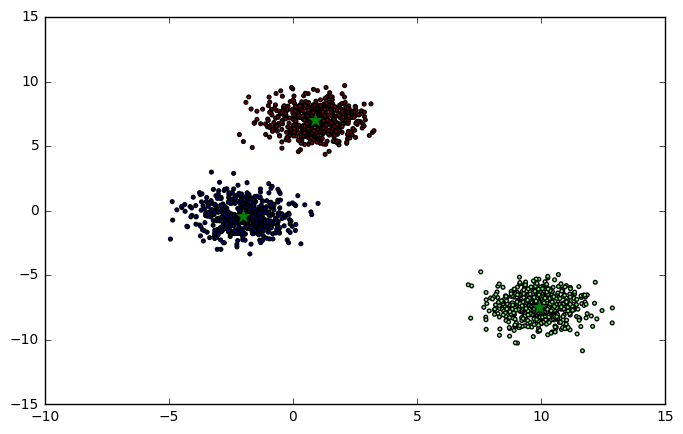

In [12]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 5)
fig = plt.figure()

# Plotting along with the Centroids

plt.scatter([actdata['x1'] for actdata in predictions], [actdata['x2'] for actdata in predictions],c=[actdata['prediction'] for actdata in predictions], s=7)
plt.scatter(np.array(C[:,0]), np.array(C[:,1]), marker='*', s=200, c='g')
